In [4]:
!pip install matplotlib

You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg
from scipy import interpolate

<br>Представим начальные данные след. образом:

In [19]:
v = np.array([0, 10, 20, 30, 40, 50, 60])
d = np.array([0, 5.0, 20, 46, 70, 102, 153])

<br> Построим график кусочно-<b>линейной</b> функции и найдем максимальную доступную скорость:

In [20]:
h = interpolate.interp1d(d, v, kind = 'linear')
h(60)

array(35.83333333)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  after removing the cwd from sys.path.


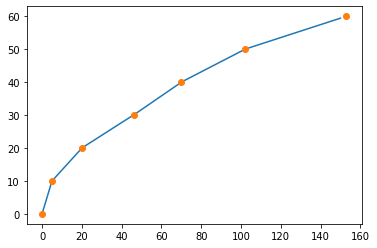

In [21]:
dd = np.linspace(0, 150, 500)
vv = h(dd)
plt.plot(dd, vv, color = 'tab:blue')
plt.plot(d, v, 'or', color = 'tab:orange')
pass

<br>Теперь построим график для кусочно-<b>кубической</b> интерполяции:

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  """


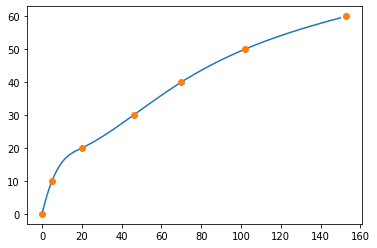

In [22]:
f = interpolate.interp1d(d, v, kind = 'cubic')
dd = np.linspace(0, 150, 500)
vv = f(dd)
plt.plot(dd, vv, color = 'tab:blue')
plt.plot(d, v, 'or', color = 'tab:orange')
pass

<br>Теперь надо вычислить значение в требуемой точке:

In [23]:
f(60)

array(36.00342639)

<br>То есть, методом <b>кубической</b> интерполяции мы выяснили, что для выполнения данного условия скорость должна быть не меньше 36.003.<br>Найдем для функции интерполяционный многочлен и вычислим с его помощью <b>искомое значение</b>

In [24]:
f = np.polyfit(d, v, 6)
print(f)

[-9.09170761e-10  3.71982217e-07 -5.69439974e-05  4.10077119e-03
 -1.43048892e-01  2.61961353e+00 -3.43756686e-13]


In [25]:
np.polyval(f, 60)

36.80827351484006

<br>С помощью <b>интерполяционнго многочлена</b>, мы получили более возможное значение скорости: 36.808. <br>График интерполяционного многочлена:

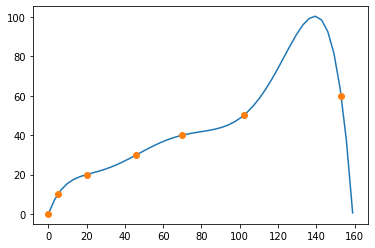

In [26]:
dd = np.linspace(0, 159, 50)
plt.plot(dd, np.polyval(f, dd))
plt.plot(d, v, 'o')
pass

<br>Наблюдаем сильный скачек на одном из данных промежутков, который далек от истины.<br>Найдем требуемую величину с помощью <b>обратной кубической интерполяции.</b>

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  """


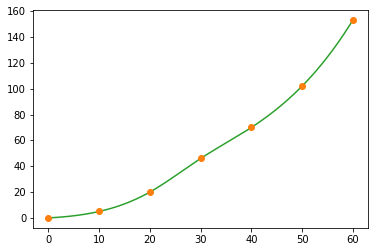

In [27]:
u= interpolate.interp1d(v, d, kind = 'cubic')
vv = np.linspace(0, 60, 500)
dd = u(vv)
plt.plot(vv, dd, color = 'tab:green')
plt.plot(v, d, 'or', color = 'tab:orange')
pass

<br>Далее сравним результаты <b>прямой</b> и <b>обратной кубической</b> интерполяции:

In [28]:
u(36.00342639)

array(60.32398532)

<br>Получим результат примерно на 0.3 больше требуемого значения.<br>Подставим результат, полученный интерполяционным многочленом:

In [29]:
u(36.808273514842234)

array(62.20781598)

<br>И тут мы получаем разницу заметно больше, на 2 единицы скорости...<br>
<h1>Вывод:</h1>
<br>
<div>
    <ol>
        <li>Пользуясь различными методами интерполяции, получаем не одинаковые значения;</li>
        <li>Интерполяционный многочлен удобен в применении, но при высоком значении степени некоторые точки осциллируют, тем самым понижая точность вычислений;</li>
        <li>Наиболее точным оказался метод кубической интерполяции. Он наиболее плавен и близок к реальным знчениям начальных данных;</li>
    </ol>
</div>